# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

First, we import necessary packages, open the file and take a look at the first rows:

In [21]:
import pandas as pd
import plotly.express as px
import numpy as np

In [22]:
raw = pd.read_csv('bike-sharing_hourly.csv')

In [23]:
raw.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Next, we do some quick data quality check on the variables, verifying that:
* All data types are accurate for the fields
* There are no obvious outliers or erroneous data in the fields
* There are no nulls present in the entire dataset

In [24]:
raw.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [25]:
raw.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [26]:
raw.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Now we create a copy dataframe to obtain insights. Given the dataset and the questions that the administration of Washington D.C. has for us, we ran the following analysis to better understand customer usage. This includes understanding which conditions favor more participation and some ideas that could benefit potential marketing on behalf of the city.

In [27]:
eda_df = raw.copy()
#eda_df.head()

In [28]:
# Features to study:
# How many people use the service varying the atemp
# Casual vs Registered varying by month (maybe some marketing analysis can be done here?)
# Humidity vs usage (weather permitting)
# Month with most 'ideal' days as established by a metric calculated (spin this as something to market a public bike race or something)
# Histogram with most users per hour.
# Weekday vs cnt (box plots, one per dow)
# Cnt vs weather type in box plots

### Insight 1: Usage of service vs variation in feeling temperature
First, we want to understand which conditions are more favorable for our users. This way we can understand what patterns might lead to maximum usage, as well as better forecasting of client surges in the event that we want to be mindful of our supply. In this case, we are looking for which (felt) temperatures tend to bring in more clients. We bin all felt temperatures into groups of 5 degrees (After denormalizing to use known measurements), then build a histogram to see what the curve is. Apparently, the most preferred temperature of our users is between 31 and 35 degrees Celsius to use the bike service.

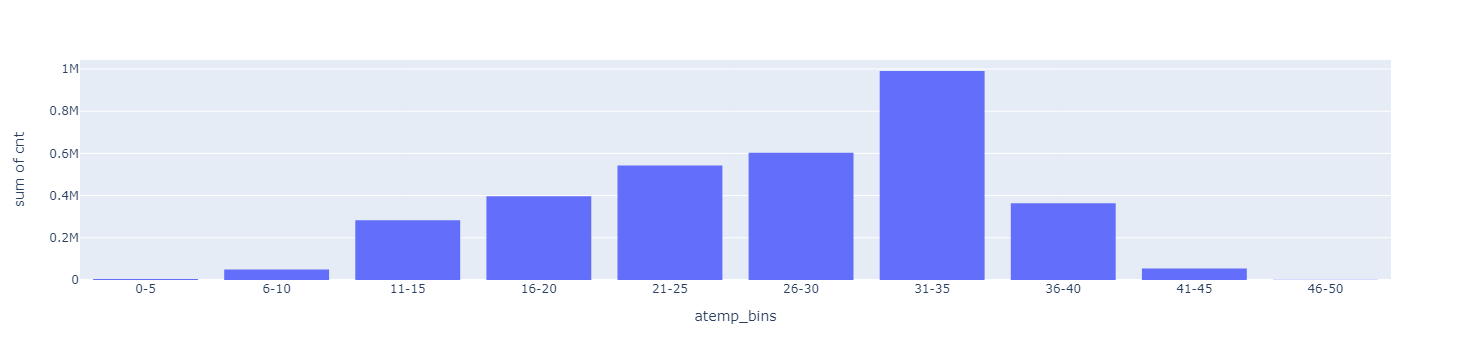

In [29]:
# First, we denormalize the variable (assuming minimum of 0C° and maximum of 50C°)
eda_df['atemp_denorm'] = [round(i*50) for i in eda_df['atemp']]

# Then, we bin the felt temperatures
eda_df['atemp_bins'] = pd.cut(x=eda_df['atemp_denorm'], bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                              labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50'])

# We continue by plotting how (perceived) temperature affects user count.
atemp_data = eda_df[['cnt', 'atemp_bins']]
atemp_data_hist = px.histogram(atemp_data, x='atemp_bins', y='cnt', category_orders=dict(atemp_bins=['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50']))
atemp_data_hist

### Insight 2: Casual vs Registered users by month
Up next, we compare usage month-over-month of our users, and we split it between those who use our system casually and those who are registered with us. This give us two insights:
* There is a much larger proportion of registered users as opposed to casual ones
* During high seasons there seems to be more registered users than casual ones from average.

With user registration, we can better provide our services by being able to anonymously track each one across journeys. This would allow us to understand usage patterns better. Not to mention we can launch a marketing initiative to try to incentivize casual users to join the registry during those high season months, as they seem more prone to do so.

<AxesSubplot:xlabel='month_date'>

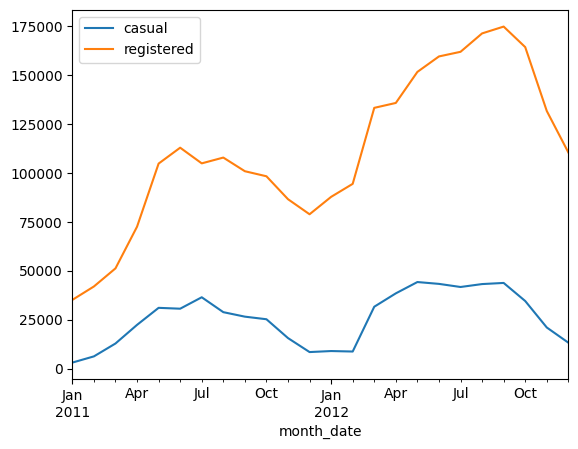

In [30]:
# First, we create a month field to section by first of month (for both years separately):
eda_df['month_date'] = [pd.to_datetime(str(i)[:8]+'01') for i in eda_df['dteday']]
cas_reg = eda_df[['month_date', 'casual', 'registered']]

# We add up the values per month
cas_reg = cas_reg.groupby('month_date', as_index=False).sum()

# We do a line plot to compare both behaviors over time.
cas_reg.plot(x='month_date', y=['casual', 'registered'])

### Insight 3: Effect of humidity on everyday usage
Is humidity a factor in usage? Do our customers think about this before getting on one of our bikes?
With a correlation coefficient of -.09, the points out that no, the humidity of a given day is not a contributing factor to using our services. 

In [41]:
# We filter all weather conditions that are logically less than ideal
hum_use = eda_df[eda_df.weathersit <= 2]
hum_use = hum_use[hum_use.season <=2]

# We aggregate by day to obtain average humidity and sum of users for each day
hum_use = hum_use.groupby('dteday').agg(cnt=('cnt', np.sum), hum=('hum', np.mean))

# We run a correlation matrix on humidity and usage
hum_use = hum_use[['cnt', 'hum']]
hum_use.corr()

,cnt,hum
cnt,1.000000,-0.091801
hum,-0.091801,1.000000


### Insight 4: Which month has more 'ideal' days
In order to capture more attention of the general public, we came up with the idea of holding public events to incentivize use of our platform and bikes. a 10k bikeathon would likely be a hit with our users, we believe. The issue with this is that we want to maximize the number of participants that day, and the best way to do so is to setting up an event on a day whose weather is ideal for bikers to join. Since we can't predict the exact weather of a day too much in advance, we identified a metric to establish what a 'good day' is, then count these throughout the years to see which month has the higher probability of giving us a 'good day' for a race.
The metrics to count a day as good are:
* Weather is clear, a little mist allowed
* Felt temperature is between 25 and 35 Celcius, as per our past insight
* Wind speed is under 25
* It is not a working day

Based on our findings, we conclude that the best months for an outdoor event to gather clients would be between June and July. However, data also points to September being acceptable if need be.

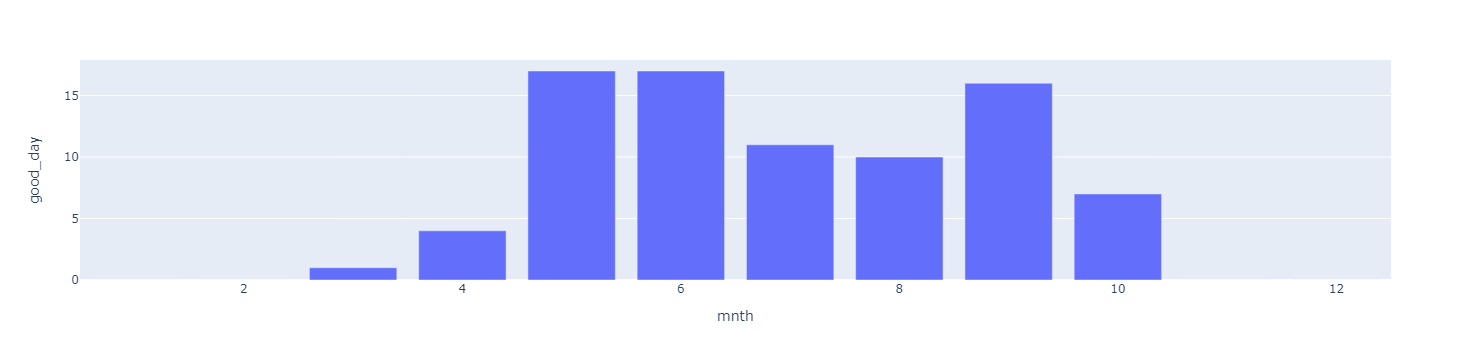

In [32]:
# First we denormalize wind speed to use it with its normal metric.
eda_df['windspeed_denorm'] = [round(i*67) for i in eda_df['windspeed']]

# Next, we obtain the features we need to qualify a day as 'good', with an average per day.
best_mo = eda_df.groupby(['dteday', 'month_date'], as_index=False).mean()
best_mo = best_mo[['dteday', 'mnth', 'workingday', 'weathersit', 'atemp_denorm', 'windspeed_denorm']]

# We define a function that checks if a given day in the dataset meets the criteria
def good_day(best_mo):
    if ((best_mo['workingday'] < 0.1) and
    (best_mo['weathersit'] < 2.0) and
    (best_mo['atemp_denorm'] >= 25.0) and 
    (best_mo['atemp_denorm'] <= 35.0) and
    (best_mo['windspeed_denorm'] <= 25.0)):
        return 1
    else:
        return 0

# We apply the formula and obtain the aggregate of good days by month
best_mo['good_day'] = best_mo.apply(good_day, axis=1)
best_mo = best_mo.groupby('mnth', as_index=False).sum()
best_mo['mnth'] = best_mo['mnth'].astype(int)

# Lastly, we plot the graph
best_mo_hist = px.bar(best_mo, x='mnth', y='good_day')
best_mo_hist

### Insight 5: Users per hour
By building a histogram that plots users by hour, we can see a clear bimodal curve. This shows that most users come to our services around 8 in the morning and around 5-6 in the afternoon. This makes perfect sense considering that those are the rush hour times. Perhaps our clients want to avoid car traffic, or they believe this is to be a healthier or greener alternative to driving. Either way, with this information at hand we can likely come up with some marketing scheme, where we give a subscription to users in exchange to reduced rates at peak times or something of the matter. 

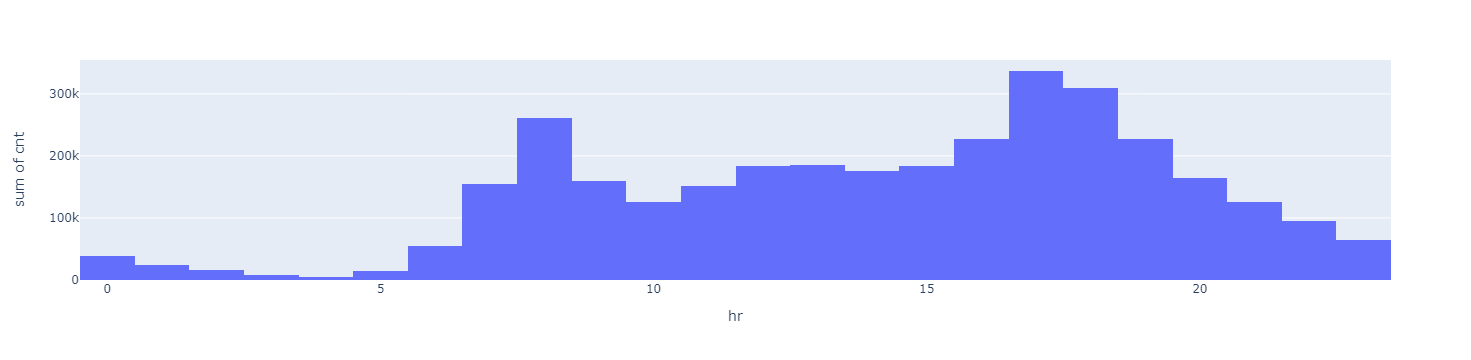

In [33]:
# We plot both variables together
hour_users_hist = px.histogram(eda_df, x='hr', y='cnt')
hour_users_hist

### Insight 6: Day of Week vs usage
We wanted to better understand if a given day of week had more general use than another. For context, are our clients using our services more during leisure on the weekends, or is the service more used to commute to work? Turns out this is a little inconclusive, as the behavior between days doesn't vary by a large enough amount to be able to claim so. There seems to be some grater variance in use on the weekends; however, the means are close enough for us to be able to say that there is no discernable pattern across days of week.

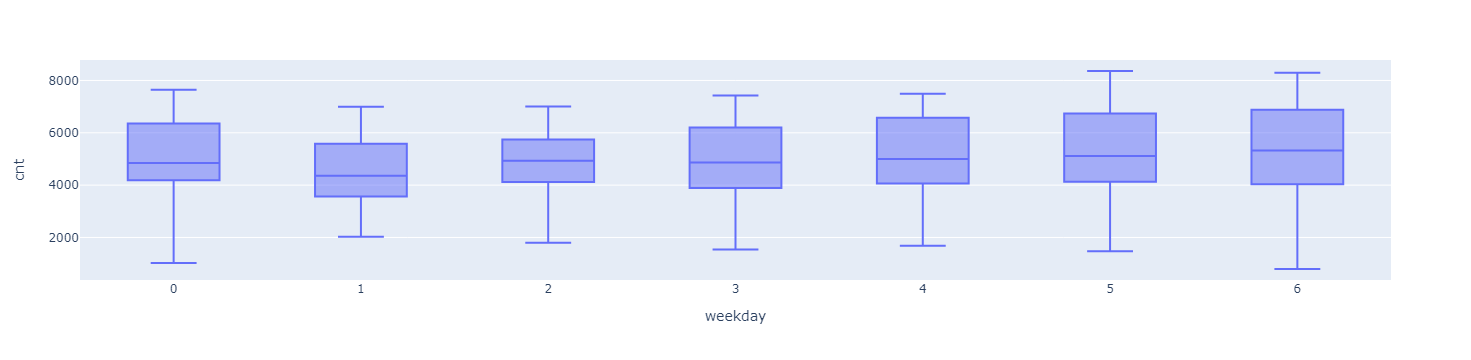

In [34]:
# First, we filter to only evaluate the Summer, which is our most active season.
dow_use = eda_df[eda_df['season']==2]

# We aggregate usage by day of week
dow_use = dow_use.groupby(['dteday', 'weekday'], as_index=False).sum()

# We display the box plot
dow_use_box = px.box(dow_use, x='weekday', y='cnt')
dow_use_box

### Insight 7: Weather type vs usage
While this makes logical sense, we wanted to see by what amounts are our customers stopping using our services as weather gets progressively worse. As evidenced in the data in our graph below, there is very little participation when the weather is in a bad shape. However, it is interesting to note that misty days have a definitively smaller amount of customers than one with a fully cleared day. Mist doesn't exactly affect the biking experience, so perhaps this is psychological behavior. Maybe it would be an interesting proposition to study offering discounts in misty days so we can incentivize use instead of seeing the potential go to waste.

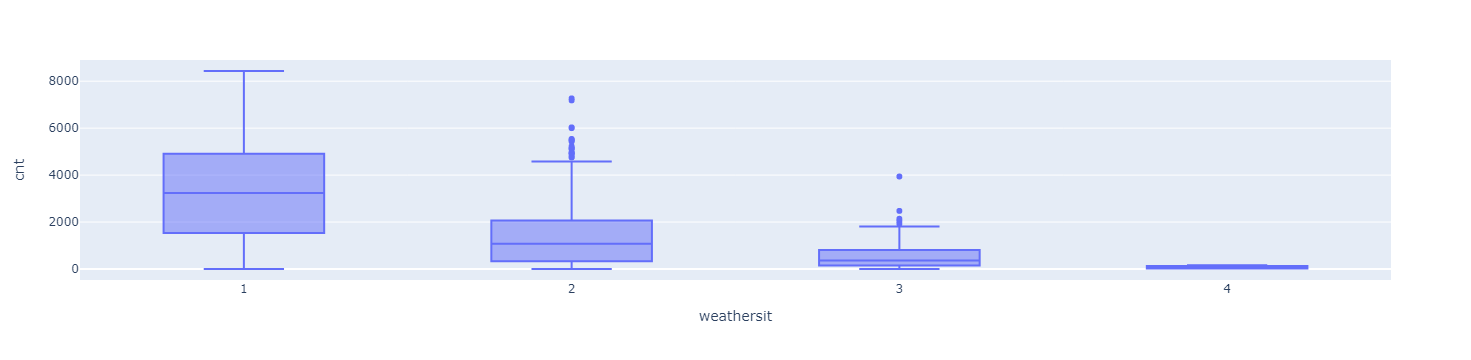

In [44]:
# First we aggregate the count of users by day and weather conditions to see how they stack against each other
weather_use = eda_df.groupby(['dteday', 'weathersit'], as_index=False).sum()

# Lastly we plot the box plot.
weather_use_box = px.box(weather_use, x='weathersit', y='cnt')
weather_use_box

## PART II: Prediction Model

## PART III: Streamlit dashboard

In [36]:
### This part goes in a separate script ###